In [1]:
import os
# Replace the path below with the actual path to your local Git repository
repo_path = r'C:\Users\egeki\OneDrive\Masaüstü\football\Scrape-Whoscored-Event-Data'

# Change directory to the repository
os.chdir(repo_path)

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.patches import ConnectionPatch
from mplsoccer.pitch import Pitch, VerticalPitch
from itertools import combinations
import seaborn as sns
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import main
import visuals
import seaborn as sns
import requests
import utils

%load_ext autoreload
%autoreload 2

In [2]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://www.whoscored.com/Matches/1842976/Live/Turkey-Super-Lig-2024-2025-Antalyaspor-Galatasaray"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Turkey, League: Super Lig, Season: 2024/2025, Match Id: 1842976


In [3]:
events_df = main.addEpvToDataFrame(events_df)
# Remove duplicate columns
events_df = events_df.loc[:, ~events_df.columns.duplicated()]
events_df

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,EPV
0,2.735625e+09,2,0,0.0,294,a,0.0,0.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,NaN
1,2.735625e+09,3,0,0.0,227,h,0.0,0.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,NaN
2,2.735625e+09,3,0,0.0,294,a,50.2,50.1,0,FirstHalf,...,False,False,False,False,False,True,False,False,True,-0.004
3,2.735625e+09,4,0,3.0,294,a,28.4,50.3,0,FirstHalf,...,False,False,False,False,False,False,False,True,True,NaN
4,2.735625e+09,4,0,7.0,227,h,35.9,44.3,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,2.735766e+09,879,97,25.0,294,a,0.0,0.0,105,SecondHalf,...,False,False,False,False,False,False,False,False,False,NaN
1544,2.735766e+09,857,0,0.0,227,h,0.0,0.0,15,PostGame,...,False,False,False,False,False,False,False,False,False,NaN
1545,2.735766e+09,880,0,0.0,294,a,0.0,0.0,15,PostGame,...,False,False,False,False,False,False,False,False,False,NaN
1546,2.735493e+09,1,0,0.0,294,a,0.0,0.0,0,PreMatch,...,False,False,False,False,False,False,False,False,False,NaN


In [4]:
# Team data
team = 'Galatasaray'
teamId = 294
opponent = 'Antalyaspor'
venue = 'away'
matchId=match_data['matchId']

In [5]:
# getting team id and venue
if match_data['home']['name'] == team:
    teamId = match_data['home']['teamId']
    venue = 'home'
else:
    teamId = match_data['away']['teamId']
    venue = 'away'


# getting opponent   
if venue == 'home':
    opponent = match_data['away']['name']
else:
    opponent = match_data['home']['name']


# getting player dictionary
team_players_dict = {}
for player in match_data[venue]['players']:
    team_players_dict[player['playerId']] = player['name']


# getting minute of first substitution
#for i in events_df.index:
#    if events_df.loc[i, 'type'] == 'SubstitutionOn' and events_df.loc[i, 'teamId'] == teamId:
 #       sub_minute = str(events_df.loc[i, 'minute'])
 #       break
sub_minute = 71 #defining manually for this case (Jakobs was out on minute 21)

In [6]:
# getting players dataframe
match_players_df = pd.DataFrame()
player_names = []
player_ids = []
player_pos = []
player_kit_number = []


for player in match_data[venue]['players']:
    player_names.append(player['name'])
    player_ids.append(player['playerId'])
    player_pos.append(player['position'])
    player_kit_number.append(player['shirtNo'])

match_players_df['playerId'] = player_ids
match_players_df['playerName'] = player_names
match_players_df['playerPos'] = player_pos
match_players_df['playerKitNumber'] = player_kit_number

In [7]:
events_df['type'].unique()

array(['Start', 'Pass', 'BallRecovery', 'Dispossessed', 'Tackle',
       'TakeOn', 'Interception', 'BlockedPass', 'Foul', 'Clearance',
       'SavedShot', 'Save', 'KeeperPickup', 'Aerial', 'BallTouch',
       'Challenge', 'CornerAwarded', 'Goal', 'Claim', 'Card',
       'SubstitutionOff', 'SubstitutionOn', 'OffsideGiven', 'OffsidePass',
       'OffsideProvoked', 'ShieldBallOpp', 'MissedShots', 'End',
       'FormationChange', 'FormationSet'], dtype=object)

In [8]:
# extracting defensive actions
defense_df = events_df.loc[events_df['teamId'] == teamId].reset_index().drop('index', axis=1)
defense_df['playerId'] = defense_df['playerId'].astype('float').astype('Int64')
if 'playerName' in defense_df.columns:
    defense_df = defense_df.drop(columns='playerName')
defense_df.dropna(subset=["playerId"], inplace=True)
defense_df.insert(27, column='playerName', value=[team_players_dict[i] for i in list(defense_df['playerId'])])
if 'passRecipientId' in defense_df.columns:
    defense_df = defense_df.drop(columns='passRecipientId')
    defense_df = defense_df.drop(columns='passRecipientName')
defense_df.insert(28, column='passRecipientId', value=defense_df['playerId'].shift(-1))  
defense_df.insert(29, column='passRecipientName', value=defense_df['playerName'].shift(-1))  
defense_df.dropna(subset=["passRecipientName"], inplace=True)

In [9]:
types_to_include = ['Clearance', 'Tackle', 'Foul', 'Challenge','BallRecovery','Interception','Save', 'Aerial']

defense_df = defense_df.loc[defense_df['type'].isin(types_to_include), :].reset_index(drop=True)

defense_df = defense_df.merge(match_players_df, on=['playerId', 'playerName'], how='left', validate='m:1')
defense_df = defense_df.merge(match_players_df.rename({'playerId': 'passRecipientId', 'playerName':'passRecipientName'},
                                                    axis='columns'), on=['passRecipientId', 'passRecipientName'],
                                                    how='left', validate='m:1', suffixes=['', 'Receipt'])

In [10]:
defense_df

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,subOff,defensiveThird,midThird,finalThird,pos,EPV,playerPos,playerKitNumber,playerPosReceipt,playerKitNumberReceipt
0,2.735625e+09,7,0,20.0,294,a,42.7,7.2,0,FirstHalf,...,False,False,False,False,False,NaN,DMC,34,DC,6
1,2.735625e+09,8,0,22.0,294,a,37.0,6.9,0,FirstHalf,...,False,False,False,False,False,NaN,DC,6,DR,23
2,2.735625e+09,10,0,34.0,294,a,24.5,2.6,0,FirstHalf,...,False,False,False,False,False,NaN,DR,23,DC,6
3,2.735626e+09,13,0,44.0,294,a,32.0,31.8,0,FirstHalf,...,False,False,False,False,False,NaN,DMC,34,DMC,20
4,2.735626e+09,14,0,46.0,294,a,33.6,44.6,0,FirstHalf,...,False,False,False,False,False,NaN,DMC,20,DMC,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2.735765e+09,866,96,23.0,294,a,19.1,71.7,104,SecondHalf,...,False,True,False,False,False,NaN,DC,6,DC,6
165,2.735765e+09,867,96,30.0,294,a,8.1,66.1,104,SecondHalf,...,False,True,False,False,False,NaN,DC,6,DMC,34
166,2.735765e+09,868,96,33.0,294,a,22.5,50.2,104,SecondHalf,...,False,False,False,False,False,NaN,DMC,34,DC,6
167,2.735765e+09,870,96,39.0,294,a,21.6,38.6,104,SecondHalf,...,False,False,False,False,False,NaN,AMR,7,DMC,34


In [11]:
#only take the defense that do not involve any sub players (neither on the sending nor on the receiving end)
#only take the defense that do not involve any sub players (neither on the sending nor on the receiving end)
defense_df = defense_df[defense_df['playerKitNumber'] != 4]
defense_df = defense_df[defense_df['playerKitNumberReceipt'] != 4]
defense_df = defense_df[defense_df['playerKitNumber'] != 53]
defense_df = defense_df[defense_df['playerKitNumberReceipt'] != 53]
defense_df = defense_df[defense_df['playerKitNumber'] != 22]
defense_df = defense_df[defense_df['playerKitNumberReceipt'] != 22]
defense_df = defense_df[defense_df['playerKitNumber'] != 45]
defense_df = defense_df[defense_df['playerKitNumberReceipt'] != 45]
defense_df = defense_df[defense_df['playerKitNumber'] != 44]
defense_df = defense_df[defense_df['playerKitNumberReceipt'] != 44]

# getting team formation
formation = match_data[venue]['formations'][0]['formationName']
formation = '-'.join(formation)

In [12]:
location_formation = defense_df[['id','playerKitNumber','x', 'y']]

In [13]:
average_locs_and_count = location_formation.groupby('playerKitNumber').agg({'x': ['mean'], 'y': ['mean', 'count']})
average_locs_and_count.columns = ['x', 'y', 'count']

In [14]:
average_locs_and_count

,x,y,count
playerKitNumber,,,
1,7.500000,47.685714,7
6,24.540909,38.086364,22
7,48.113636,31.090909,22
9,62.266667,63.350000,6
10,51.811111,39.311111,9
11,36.188889,75.433333,9
18,29.900000,73.653333,15
20,36.810000,45.700000,10
23,28.023077,21.061538,13


In [15]:
#key variables for the pass network extraction

max_line_width=200
marker_size=1000
edgewidth=3
dh_arrow_width=20
marker_color='#8B0000'
marker_edge_color='white'
shrink=10
#ax=ax
kit_no_size=12
num_color='#FFD700'

In [16]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.patches as patches

font_path = 'C:/Users/egeki/Downloads/Arvo/Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)
background_color = '#0C0D0E'

In [17]:
#logos
# Load a PNG image from a file
antalya_path = r'C:\Users\egeki\OneDrive\Masaüstü\football\pitchParcelization\antalya.png'
gs_path = r'C:\Users\egeki\OneDrive\Masaüstü\football\pitchParcelization\gs.png'

antalya_logo = Image.open(antalya_path)
gs_logo = Image.open(gs_path)

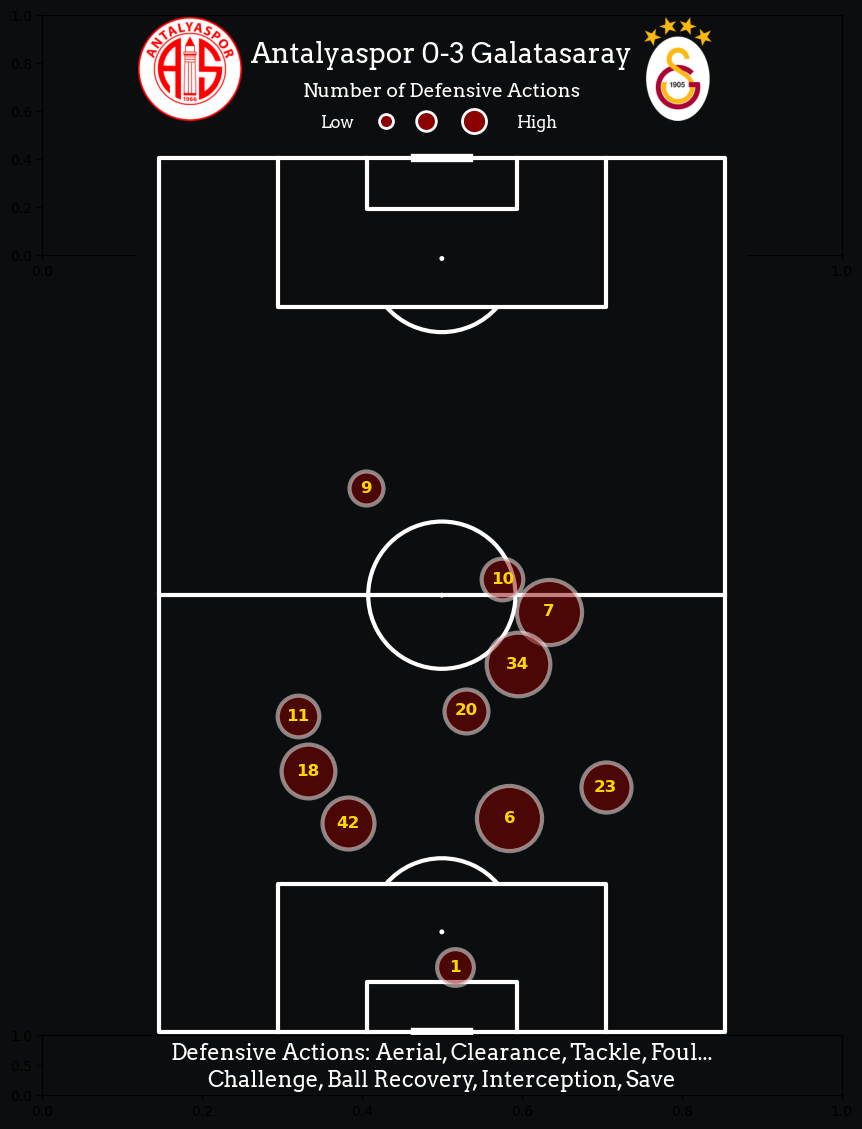

In [18]:
# plotting
# Create Pass Network - Progressive Passes Sent    
# you can change marker_label to 'name' as well
fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

ax1.text(
    x=0.5, 
    y=.8, 
    s='Antalyaspor 0-3 Galatasaray', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='center'
)

ax1.text(
    x=0.5, 
    y=.66, 
    s=f'Number of Defensive Actions', 
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props, 
    color='white', 
    ha='center'
)

# add a scatter point between the two texts
ax1.text(
    x=0.37, 
    y=0.53, 
    s=f'Low', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)
ax1.scatter(
    x=0.43, 
    y=0.56, 
    s=100, 
    color=marker_color, 
    edgecolor='white', 
    linewidth=2
)
ax1.scatter(
    x=0.48, 
    y=0.56, 
    s=200, 
    color=marker_color, 
    edgecolor='white', 
    linewidth=2
)
ax1.scatter(
    x=0.54,
    y=0.56, 
    s=300, 
    color=marker_color, 
    edgecolor='white', 
    linewidth=2
)

ax1.text(
    x=0.62, 
    y=0.53, 
    s=f'High', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white',
    ha='center'
)

ax2 = fig.add_axes([.05, .05, 0.9, .75])

# plotting
pitch = VerticalPitch(
    pitch_type='opta', 
    pitch_color=background_color,
    pad_bottom=.5, 
    line_color='white',
    linewidth=3,
    axis=False, label=False,
)
pitch.draw(ax=ax2, constrained_layout=True, tight_layout=True)

#placing the z-axis depths differently for each layer of player
average_locs_and_count['zorder'] = list(np.linspace(1,5,11))

counter=0
for i in average_locs_and_count.index:
    pitch.scatter(average_locs_and_count.loc[i, 'x'], average_locs_and_count.loc[i, 'y'], s=(marker_size*average_locs_and_count['count'].iloc[counter])/10,
                  color=marker_color, edgecolors=marker_edge_color, linewidth=edgewidth, 
                  alpha=0.5, zorder=average_locs_and_count.loc[i, 'zorder'], ax=ax2)
    counter = counter+1


for i in average_locs_and_count.index:   
    pitch.annotate(i, xy=(average_locs_and_count.loc[i, 'x'], average_locs_and_count.loc[i, 'y']), 
                   family='DejaVu Sans', c=num_color, 
                   va='center', ha='center', zorder=average_locs_and_count.loc[i, 'zorder'], size=kit_no_size, weight='bold', ax=ax2)
 
ax3 = fig.add_axes([0, 0, 1, .05])
ax3.set_facecolor(background_color)
ax3.text(x=0.5, 
    y=.6, 
    s=f'Defensive Actions: Aerial, Clearance, Tackle, Foul...', 
    fontsize=16, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)
ax3.text(x=0.5, 
    y=.15, 
    s=f'Challenge, Ball Recovery, Interception, Save',
    fontsize=16, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)

ax4 = fig.add_axes([.12,.79,.13,.13])
ax4.axis('off')
img = Image.open(antalya_path)
ax4.imshow(img)

ax5 = fig.add_axes([.73,.79,.13,.13])
ax5.axis('off')
img = Image.open(gs_path)
ax5.imshow(img)
#
#ax3.text(0.5, .5, "{} - {} (Mins 1-{})".format(team, opponent,sub_minute), size=16, fontproperties = font_props, fontweight='bold', ha='center',
       #va='center', c=num_color)
#ax.text(2, 3, '{}'.format(formation), size=9, c='grey')

In [19]:
fig.savefig(r'C:\Users\egeki\OneDrive\Masaüstü\football\pitchParcelization\Antalya_Gs_defNetwork.png', facecolor=background_color, bbox_inches='tight', dpi=600)